**CLASSIFICATION**

To forecast the probability of survival, classification is performed on the Titanic dataset.

**TITANIC TRAIN DATASET**

**Import Dataset:**

You can utilize the pandas library to import the dataset and read_csv() function to load it into a pandas dataframe. After importing the dataset, you may conduct the mandatory preprocessing steps prior to classifying the data.

In [1]:
import pandas as pd
df_train = pd.read_csv('/kaggle/input/titanictraina/Titanic_train.csv')
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**Explore Dataset**

You may obtain a deeper understanding of the dataset's characteristics and distributions through inspection, and you can also spot any issues—like missing numbers or anomalies—that need to be fixed during the data processing process.

1)Use the head() method to see the dataset's initial few rows.

2)Use the shape feature to determine the dataset's dimensions.

3)Use the info() method to verify the column names and data types.

4)Use the describe() method to look up the dataset's statistical summary.

5)Use the isnull() method to see if the dataset has any missing values.

In [2]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_train.shape

(891, 12)

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**DATA PREPROCESSING**

**Data Cleaning**

Data cleaning is the procedure of detecting and fixing or deleting mistakes, inconsistencies, and inaccuracies from a dataset. Its objective is to enhance the standard and dependability of the data and make it suitable for analysis. Data cleaning involves a variety of tasks such as managing null or absent values, eliminating duplicates, adjusting data types, handling outliers, and fixing disparities in data values. It is a crucial component of the data preprocessing pipeline, as it guarantees the precision and dependability of data analysis and modeling outcomes.

**1) Detect and manage absent or empty values:**Examine the dataset for any missing or null values and determine the optimal approach, which may involve either filling in the missing values or eliminating the affected rows or columns.

The fields for passenger id, name, ticket, and cabin have been removed because they are not useful in determining the survival rate.

In [8]:
df_train.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

The missing values in the Age column are substituted with the average age value of the available data.

In [9]:
df_train['Age'].fillna(df_train['Age'].mean(),inplace=True)

df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [10]:
df_train.count()

Survived    891
Pclass      891
Sex         891
Age         891
SibSp       891
Parch       891
Fare        891
Embarked    889
dtype: int64

The missing values in the Embarked column are substituted with the mode value, which is the most frequently occurring value among the available data. This is a common approach for dealing with missing values in categorical data, where the mode value provides a reasonable estimate for the missing value.

In [11]:
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0],inplace=True)
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [12]:
df_train.count()

Survived    891
Pclass      891
Sex         891
Age         891
SibSp       891
Parch       891
Fare        891
Embarked    891
dtype: int64

In [13]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


**Feature Extraction**

With the Titanic dataset, feature extraction entails choosing and manipulating the pertinent input variables to produce new features that identify significant patterns and correlations in the data.

It is possible to create a new **"Family"** feature by utilizing the **SibSp** and **Parch** features. This involves combining the information from these two features to create a new feature that represents the family size or the number of family members onboard for each individual.

In [14]:
# Create Family feature
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch']
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0


In [15]:
# Drop SibSp and Parch
df_train.drop('SibSp',axis=1,inplace=True)
df_train.drop('Parch',axis=1,inplace=True)
df_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


Verify the data types of each column and modify them to the appropriate data type if needed.

In [16]:
#Convert categorical data to numerical data
df_train['Sex']= df_train['Sex'].map({'female':0,'male':1})

In [17]:
#Convert categorical data to numerical data
df_train['Embarked']= df_train['Embarked'].map({'C':0,'Q':1,'S':2})

In [18]:
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
Fare          0
Embarked      0
FamilySize    0
dtype: int64

**DATA VISUALIZATION**

Visualize the whole dataset

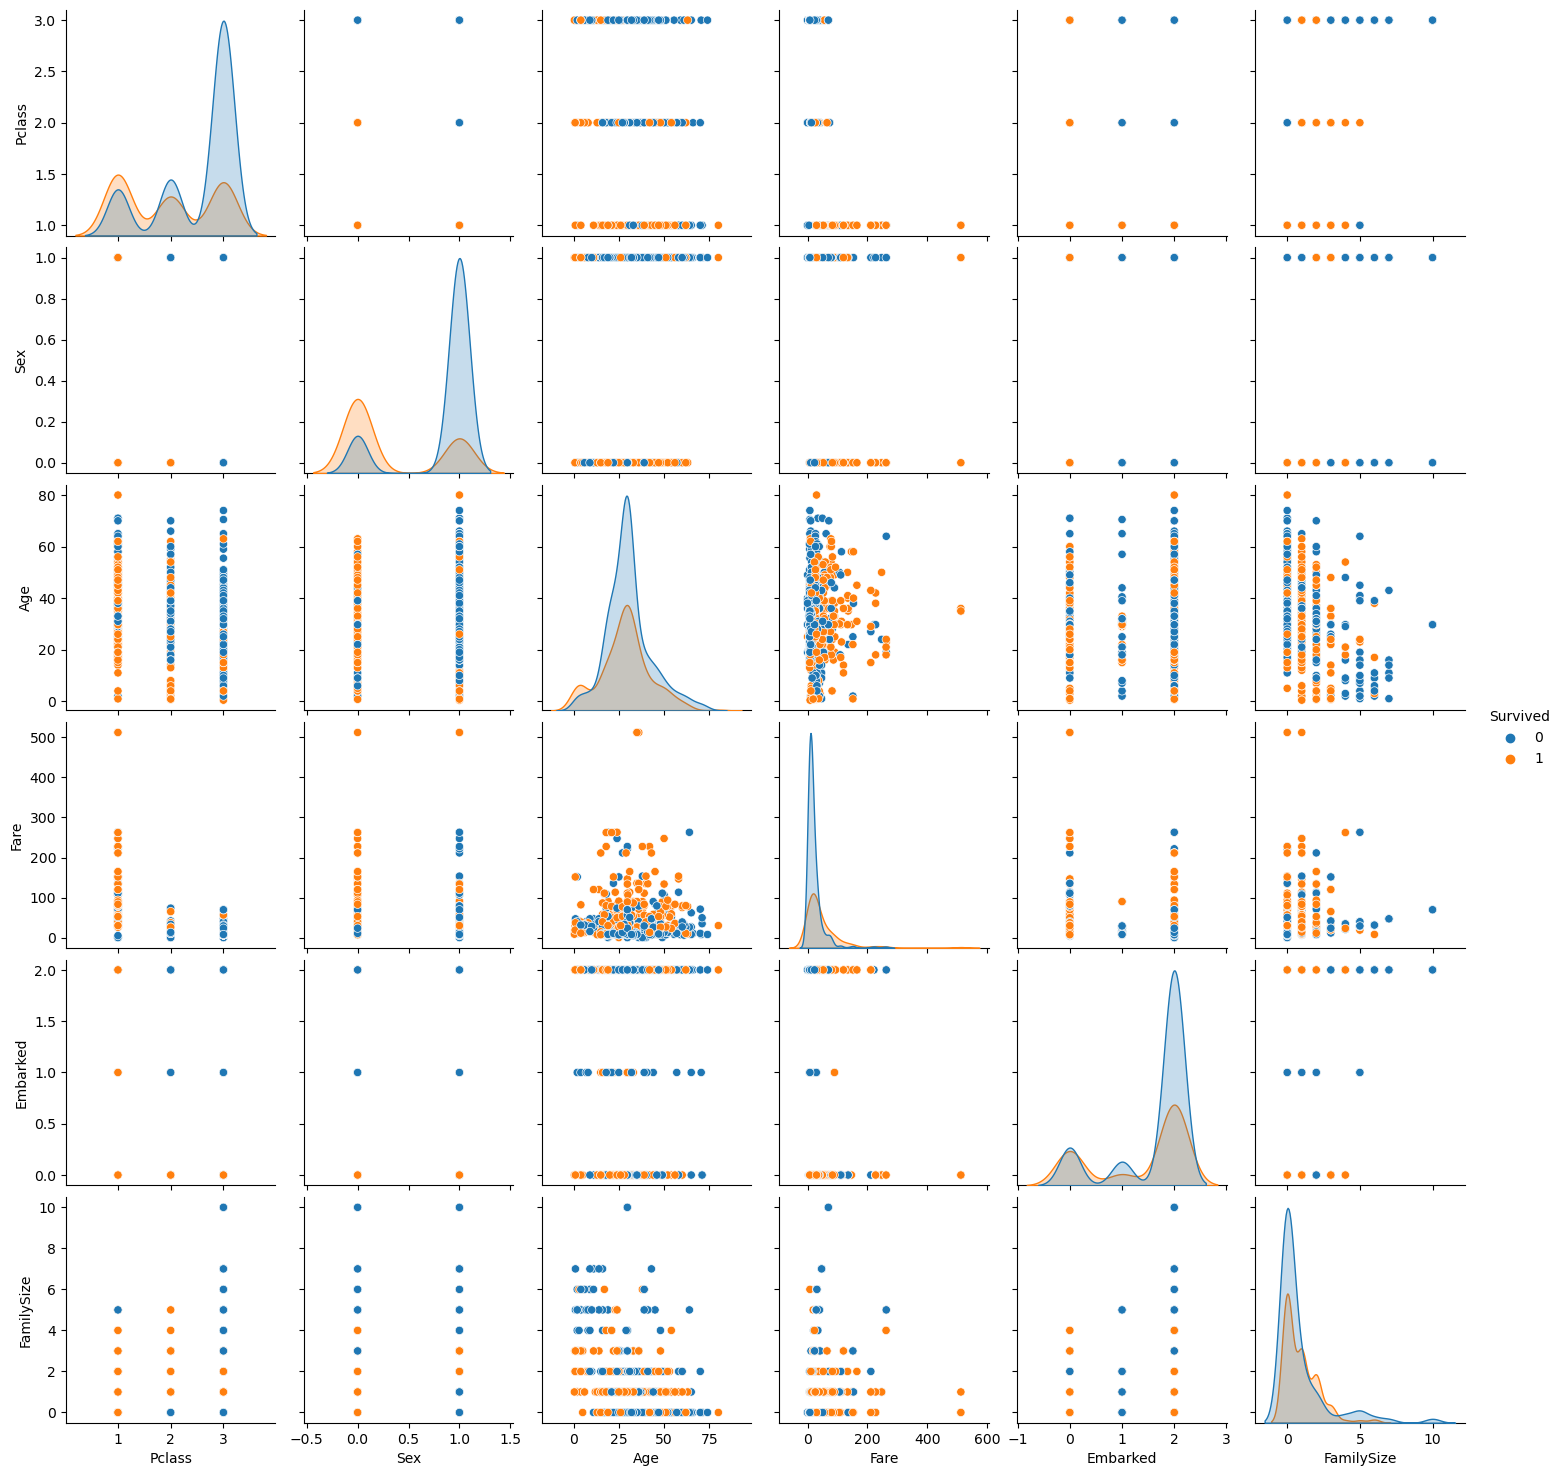

In [19]:
import seaborn as sns
# Visualize the whole dataset
sns.pairplot(df_train, hue='Survived')

To better understand and analyze the Titanic dataset, visualizations can be created to represent the data in a visual format. This involves using graphical representations to display patterns and relationships between the different features in the dataset. By doing so, it can aid in the identification of trends and patterns, which can help in making informed decisions regarding data preprocessing and model building. In summary, data visualization is a valuable tool that can be used to gain insights and a better understanding of complex datasets.
From the figure, we can find that more people are survived whose family size is big. 

**Histogram of the Age column**

With the Age column shown on the x-axis and the count of the Age values represented on the y-axis, this code will generate a histogram with 20 bins. The distribution of age in the Titanic dataset will be displayed in the resulting figure.

The age range is represented by the x-axis, and the frequency or count of the ages falling within each age range or bin is shown on the y-axis. The generated histogram can display the distribution's shape, the dataset's mean, median, and mode, as well as the age distribution. This can assist in finding trends and connections that can be utilised to influence data preparation and modelling decisions.

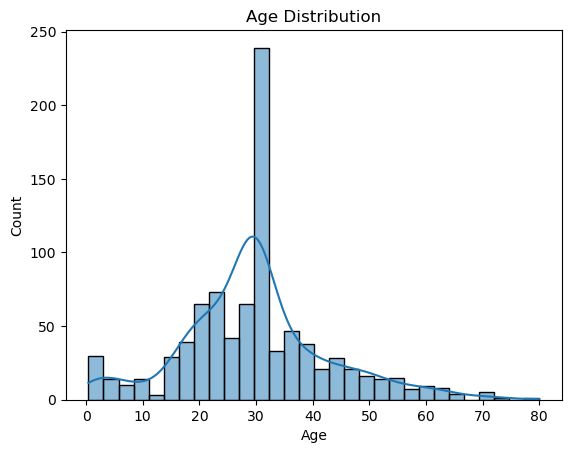

In [20]:
import matplotlib.pyplot as plt


# create a histogram of the age column
sns.histplot(df_train['Age'], kde=True, bins=30)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

**Density plot of fare column**

Instead of discrete bars like in a histogram, the density plot displays the data distribution as a smooth line. The y-axis displays the density or concentration of the fares at each point along the range, while the x-axis displays the range of fare values. The resulting graphic can display the distribution's shape, the data's skewness or symmetry, and any outliers or odd patterns. This can assist in determining associations between fare and other variables and can guide choices about the preparation and modelling of data.

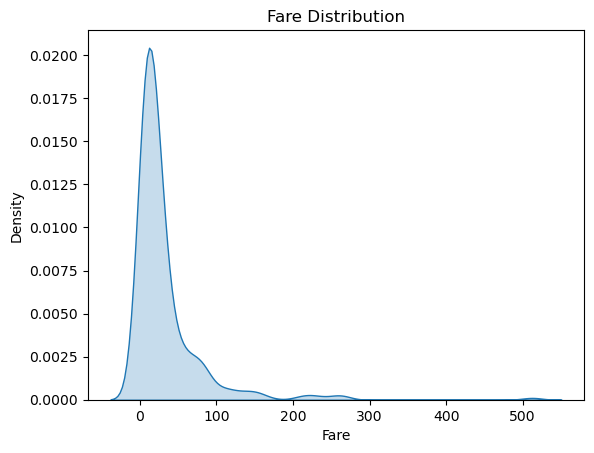

In [21]:
# create a density plot of the fare column
sns.kdeplot(df_train['Fare'], fill=True)
plt.xlabel('Fare')
plt.ylabel('Density')
plt.title('Fare Distribution')
plt.show()

**Boxplot of FamilySize**

The distribution of family sizes among the Titanic passengers is shown in a boxplot as a consequence, with the median, quartiles, and outliers. The y-axis has no meaningful scale because it is just used to illustrate the box and whisker plot and the x-axis displays the range of family sizes.

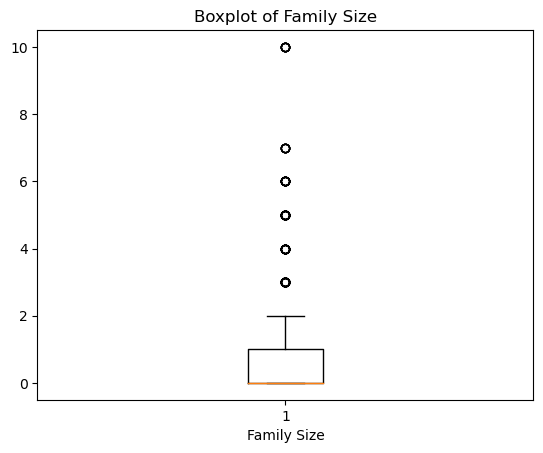

In [22]:
# Create a boxplot of the "FamilySize" column
plt.boxplot(df_train["FamilySize"])
plt.title("Boxplot of Family Size")
plt.xlabel("Family Size")
plt.show()

**FEATURE SELECTION**

Finding the most crucial input variables that have the biggest effects on the target variable is necessary for feature selection in the Titanic dataset (i.e., whether a passenger survived or not). By choosing only the most informative features, feature selection aims to lower the dataset's dimensionality, which can increase the precision and effectiveness of machine learning models.

In [23]:
# Separate features and target,select features 
features=['Pclass','Sex','Age','Fare','Embarked','FamilySize']
X_train=df_train[features]
y_train=df_train['Survived']

**Convert the data into structured format**

In [24]:
import numpy as np
X_train= np.array(X_train)
y_train= np.array(y_train)

**TITANIC TEST DATASET**

**Importing Dataset**

In [25]:
df_test = pd.read_csv('/kaggle/input/titanic-test/Titanic_test.csv')
df_test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


**Explore Dataset**

In [26]:
df_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [27]:
df_test.shape

(418, 12)

In [28]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [29]:
df_test.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [30]:
df_test.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


In [31]:
df_test.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**DATA PREPROCESSING**

**Data Cleaning**

In [32]:
df_test.drop(['PassengerId','Cabin','Name','Ticket'], axis=1, inplace=True)
df_test.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [33]:
df_test['Age'].fillna(df_test['Age'].mean(),inplace=True)

df_test.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [34]:
df_test['Fare'].fillna(df_test['Fare'].mean(),inplace=True)

df_test.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [35]:
df_test.count()

Survived    418
Pclass      418
Sex         418
Age         418
SibSp       418
Parch       418
Fare        418
Embarked    418
dtype: int64

In [36]:
df_test.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


**FEATURE EXTRACTION**

In [37]:
# Create Family feature
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch']
df_test.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,male,34.5,0,0,7.8292,Q,0
1,1,3,female,47.0,1,0,7.0000,S,1
2,0,2,male,62.0,0,0,9.6875,Q,0
3,0,3,male,27.0,0,0,8.6625,S,0
4,1,3,female,22.0,1,1,12.2875,S,2


In [38]:
# Drop SibSp and Parch
df_test.drop('SibSp',axis=1,inplace=True)
df_test.drop('Parch',axis=1,inplace=True)
df_test.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,male,34.5,7.8292,Q,0
1,1,3,female,47.0,7.0000,S,1
2,0,2,male,62.0,9.6875,Q,0
3,0,3,male,27.0,8.6625,S,0
4,1,3,female,22.0,12.2875,S,2


In [39]:
df_test.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
Fare          0
Embarked      0
FamilySize    0
dtype: int64

Verify the data types of each column and modify them to the appropriate data type if needed.

In [40]:
#Convert categorical data to numerical data
df_test['Sex']= df_test['Sex'].map({'female':0,'male':1})

In [41]:
df_test['Embarked']= df_test['Embarked'].map({'C':0,'Q':1,'S':2})

In [42]:
df_test.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
Fare          0
Embarked      0
FamilySize    0
dtype: int64

**FEATURE SELECTION**

In [43]:
# Separate features and target,select features 
feature=['Pclass','Sex','Age','Fare','Embarked','FamilySize']
X_test=df_test[feature]
y_test=df_test['Survived']

Convert data to structured data

In [44]:
X_test= np.array(X_test)

**DATA VISUALIZATION**

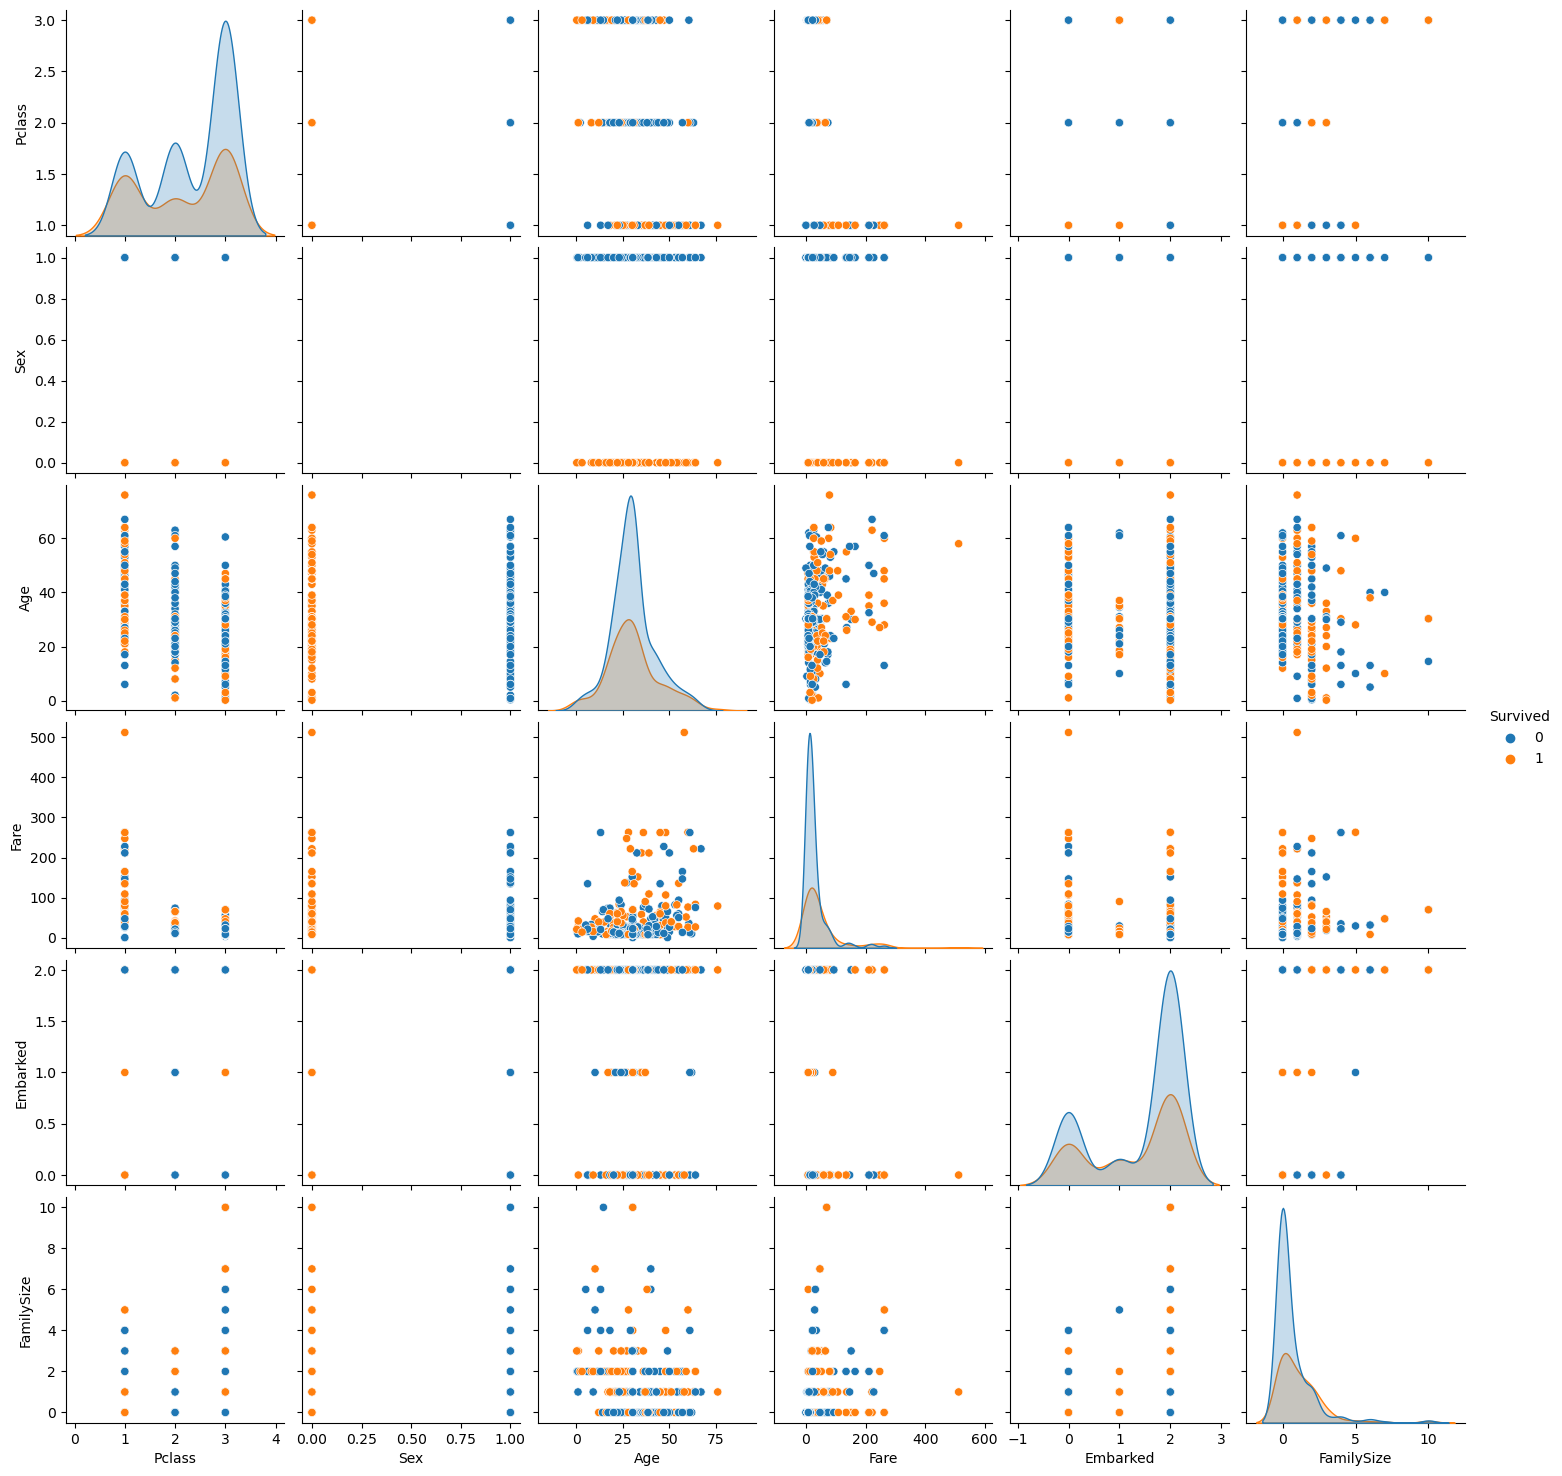

In [45]:
import seaborn as sns
# Visualize the whole dataset
sns.pairplot(df_test, hue='Survived')

**Histogram**

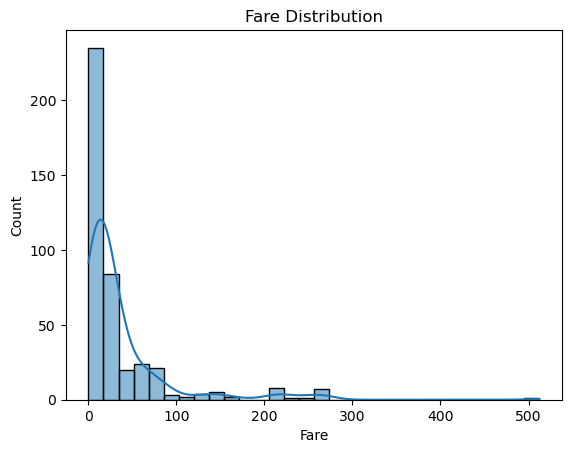

In [46]:
import matplotlib.pyplot as plt


# create a histogram of the age column
sns.histplot(df_test['Fare'], kde=True, bins=30)
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Fare Distribution')
plt.show()

**Density Plot**

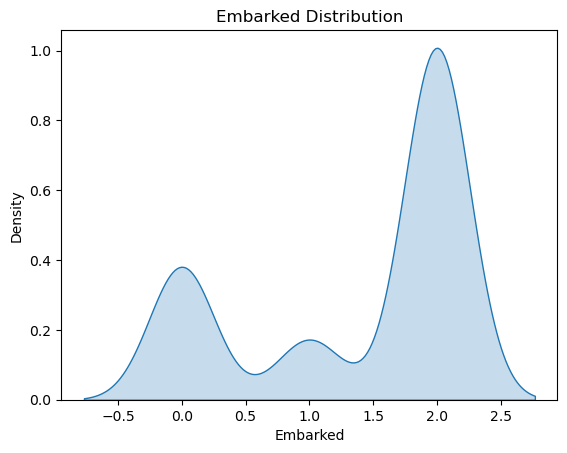

In [47]:
# create a density plot of the fare column
sns.kdeplot(df_test['Embarked'], fill=True)
plt.xlabel('Embarked')
plt.ylabel('Density')
plt.title('Embarked Distribution')
plt.show()

**Boxplot**

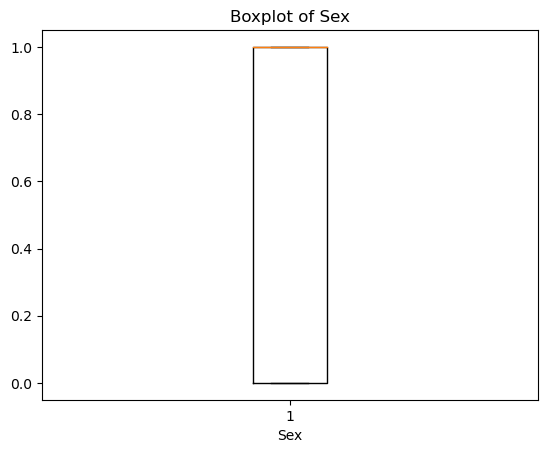

In [48]:
# Create a boxplot of the "FamilySize" column
plt.boxplot(df_test["Sex"])
plt.title("Boxplot of Sex")
plt.xlabel("Sex")
plt.show()

**CLASSIFICATION- MODEL SELECTION**

**MODEL TRAINING ON DATASET**

We first create an instance of the Random Forest model, with the default parameters. We then fit this to our training data. We pass both the features and the target variable, so the model can learn. Then make predictions on test data.

**1. Random Forest**

Random forest is a machine learning technique that improves the accuracy and robustness of a model by combining several decision trees. This approach is known as ensemble learning, where multiple models work together to make predictions.

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

#Create an Object
rfc=RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

#Fit the model Train data
rfc.fit(X_train, y_train)

#Make Prediction on Test data
y_pred = rfc.predict(X_test)
y_pred 

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       266
           1       0.94      0.86      0.89       152

    accuracy                           0.93       418
   macro avg       0.93      0.91      0.92       418
weighted avg       0.93      0.93      0.93       418



**MODEL EVALUATION**

The simplest way to evaluate this model is using accuracy; we check the predictions against the actual values in the test set and count up how many the model got right.

In [50]:
#Evalutate the accuracy of the model

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9258373205741627
Precision: 0.935251798561151
Recall: 0.8552631578947368


**2. Support Vector Machines**

SVM is a commonly used machine learning technique for classification in the Titanic dataset. Its goal is to locate a hyperplane that can optimally distinguish between various classes of data points in the feature space. For the Titanic dataset, SVM can be applied to categorize passengers as survivors or non-survivors based on their traits.

In [51]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
ypred = clf.predict(X_test)

print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       1.00      1.00      1.00       152

    accuracy                           1.00       418
   macro avg       1.00      1.00      1.00       418
weighted avg       1.00      1.00      1.00       418



**EVALUATE MODEL**

Accuracy can be computed by comparing actual test set values and predicted values. For further evaluation, you can also check precision and recall of model.

In [52]:
#Evalutate the accuracy of the model

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, ypred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, ypred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, ypred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


**3. LogisticRegression**

Logistic Regression aims to develop a model that can anticipate the probability of a binary outcome (such as survived or not survived) by using a set of predictors or independent variables.





In [53]:
#Import Logistic Regression model
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
lr = LogisticRegression()

# Train the model
lr.fit(X_train,y_train)

# Make predictions on the testing set
yhat = lr.predict(X_test)

print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       266
           1       0.91      0.93      0.92       152

    accuracy                           0.94       418
   macro avg       0.93      0.94      0.94       418
weighted avg       0.94      0.94      0.94       418



**Evaluation**

In [54]:
#Evalutate the accuracy of the model

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, yhat))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, yhat))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, yhat))

Accuracy: 0.9401913875598086
Precision: 0.9096774193548387
Recall: 0.9276315789473685


**Jaccard index**

Lets try jaccard index for accuracy evaluation. we can define jaccard as the size of the intersection divided by the size of the union of two label sets. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

In [55]:
from sklearn.metrics import jaccard_score

# Calculate the Jaccard Index
jaccard = jaccard_score(y_test, yhat)

print("Jaccard Index:", jaccard)

Jaccard Index: 0.8493975903614458


**Confusion matrix**

Another way of looking at accuracy of classifier is to look at confusion matrix.

In the context of evaluating a classification model on the Titanic dataset, a confusion matrix is a tabular representation of the model's predictions compared to the actual outcomes. The matrix has two rows and two columns, with the rows representing the true class labels and the columns representing the predicted class labels. The four cells of the matrix correspond to the number of true positives, false positives, false negatives, and true negatives. The diagonal elements of the matrix indicate the number of correctly classified examples, while the off-diagonal elements show the number of incorrectly classified examples.





In [56]:
from sklearn.metrics import confusion_matrix
# Create a confusion matrix
matrix = confusion_matrix(y_test, yhat)

print("Confusion Matrix:")
print(matrix)

Confusion Matrix:
[[252  14]
 [ 11 141]]


**4. Decision Trees**

A decision tree can be utilized to make predictions about a passenger's survival based on various factors like age, sex, ticket class, and the number of family members aboard. The decision tree algorithm works by dividing the feature space into groups that are more and more homogeneous with respect to the target class labels. At each step, the algorithm picks the feature that best separates the data into two groups with the most difference in their class labels. This process continues recursively until the data is partitioned into subsets that are as homogenous as possible with respect to the class labels.

In [57]:
from sklearn.tree import DecisionTreeClassifier

# Fit a decision tree classifier to the training data
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

# Make predictions on the test set
y_prediction = dtc.predict(X_test)

print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       266
           1       0.70      0.68      0.69       152

    accuracy                           0.78       418
   macro avg       0.76      0.76      0.76       418
weighted avg       0.78      0.78      0.78       418



In [58]:
#Evalutate the accuracy of the model

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_prediction))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_prediction))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_prediction))

# Model confusion matrix
confusion = confusion_matrix(y_test, y_prediction)
print(f"Confusion matrix:\n{confusion}")

Accuracy: 0.777511961722488
Precision: 0.7006802721088435
Recall: 0.6776315789473685
Confusion matrix:
[[222  44]
 [ 49 103]]


**5. K-Nearest Neighbors**

K-nearest neighbors (KNN) is a machine learning algorithm that can be used to classify new examples by identifying their nearest neighbors in the feature space and assigning them the majority class label of those neighbors. In the context of the Titanic dataset, KNN can be employed to classify passengers as either survivors or non-survivors based on their characteristics, such as age, gender, ticket class, and family size.

In [59]:
from sklearn.neighbors import KNeighborsClassifier

# Fit a KNN classifier to the training data
k = 5  # number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_predict = knn.predict(X_test)

print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.73      0.74      0.74       266
           1       0.54      0.53      0.53       152

    accuracy                           0.67       418
   macro avg       0.64      0.64      0.64       418
weighted avg       0.66      0.67      0.66       418



In [60]:
#Evalutate the accuracy of the model

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_predict))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_predict))

# Model confusion matrix
confusion = confusion_matrix(y_test, y_predict)
print(f"Confusion matrix:\n{confusion}")

Accuracy: 0.6650717703349283
Precision: 0.5405405405405406
Recall: 0.5263157894736842
Confusion matrix:
[[198  68]
 [ 72  80]]


**HEATMAP OF CONFUSION MATRIX**

Make a heatmap of the confusion matrix with the anticipated values on the x-axis and the actual values on the y-axis. The number in each cell indicates how many observations are included in that category.

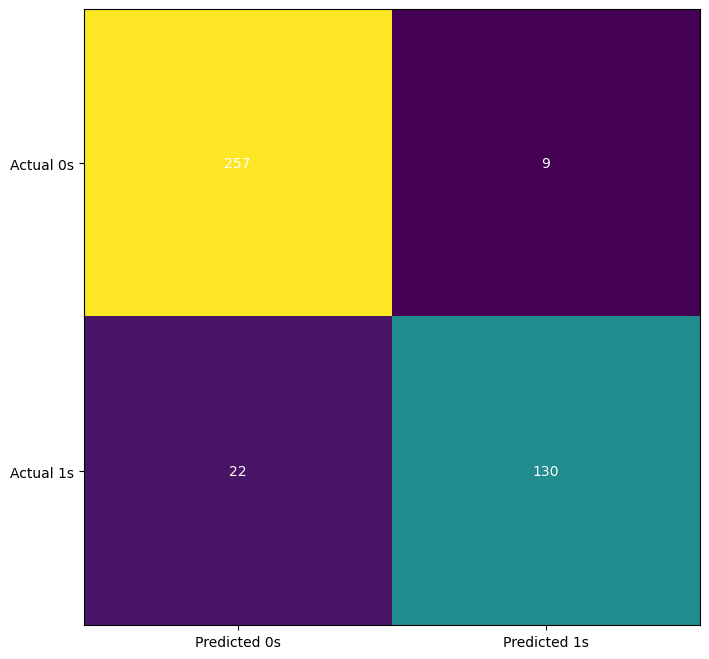

In [61]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

**Fine-tune the model**

**GRID SEARCH**

A technique for hyperparameter tuning called grid search involves looking for the hyperparameters' ideal values that result in the best model performance. We may use grid search to determine the ideal hyperparameters for our classification models, including decision trees, random forests, logistic regression, and SVM, when working with the Titanic dataset.